In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import models , layers

In [2]:
IMAGE_SIZE=256
BATCH_SIZE=32

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    'PlantVillage',
    shuffle=True ,
    seed=123,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
)

Found 2152 files belonging to 3 classes.


In [4]:
len(dataset)

68

In [5]:
class_names=dataset.class_names

In [6]:
type(dataset)

tensorflow.python.data.ops.prefetch_op._PrefetchDataset

In [7]:
def divide_the_dataset(dataset,trainset=0.8,valset=0.1,testset=0.1):
    dataset=dataset.shuffle(10000,seed=12)
    train_db=dataset.take(54)
    test_db=dataset.skip(54)
    val_db=test_db.take(6)
    test_db=test_db.skip(6)
    return train_db,val_db,test_db

In [8]:
train_ds, val_ds, test_ds = divide_the_dataset(dataset)

In [9]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [10]:
resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.Rescaling(1./255),
])

In [11]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

In [12]:
train_ds = train_ds.map(lambda x, y: (data_augmentation(x, training=True), y)).prefetch(buffer_size=tf.data.AUTOTUNE)

In [13]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, 3)
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(3,activation='softmax')
])

In [14]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [16]:
history = model.fit(train_ds,validation_data=val_ds,epochs=50)

Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 144s 3s/step - accuracy: 0.4249 - loss: 0.9478 - val_accuracy: 0.6510 - val_loss: 0.7418
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 281s 5s/step - accuracy: 0.6908 - loss: 0.7125 - val_accuracy: 0.7240 - val_loss: 0.6392
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 166s 3s/step - accuracy: 0.8132 - loss: 0.4707 - val_accuracy: 0.8333 - val_loss: 0.4252
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 212s 4s/step - accuracy: 0.8774 - loss: 0.3241 - val_accuracy: 0.9115 - val_loss: 0.2871
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 133s 2s/step - accuracy: 0.9239 - loss: 0.2129 - val_accuracy: 0.9271 - val_loss: 0.1830
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 124s 2s/step - accuracy: 0.9616 - loss: 0.1266 - val_accuracy: 0.9375 - val_loss: 0.1603
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 157s 3s/step - accuracy: 0.9666 - loss: 0.0930 - val_accuracy: 0.9635 - val_loss: 0.0759
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 128s 2s/step - accuracy: 0.9389 - loss: 0.1433 - val_accuracy: 0.9479 - v

In [17]:
scores=model.evaluate(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 452ms/step - accuracy: 0.9965 - loss: 0.0165


In [18]:
scores

[0.024986088275909424, 0.9921875]

first image actual label: Potato___Late_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step
first image predicted label: Potato___Late_blight


2024-07-02 20:28:28.582813: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


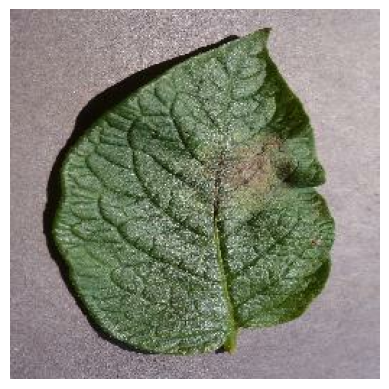

In [19]:
import numpy as np
for image_batch,label_batch in test_ds.take(1):
    first_image=image_batch[0].numpy().astype('uint8')
    first_label=label_batch[0].numpy()
    
    print("first image actual label:",class_names[first_label])
    plt.imshow(first_image)
    predicted_batch=model.predict(image_batch)
    first_predicted_image=np.argmax(predicted_batch[0])
    print("first image predicted label:",class_names[first_predicted_image])
    plt.axis('off')

In [20]:
def predict(model,image):
    img_array=tf.keras.utils.img_to_array(image)
    # print(img_array.shape)
    img_array=tf.expand_dims(img_array,0)
    # print(img_array.shape)
    predictions=model.predict(img_array)
    prediction_class=class_names[np.argmax(predictions[0])]
    confidence=round(100*(np.max(predictions[0])),2)
    return prediction_class,confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


2024-07-02 20:28:29.574633: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


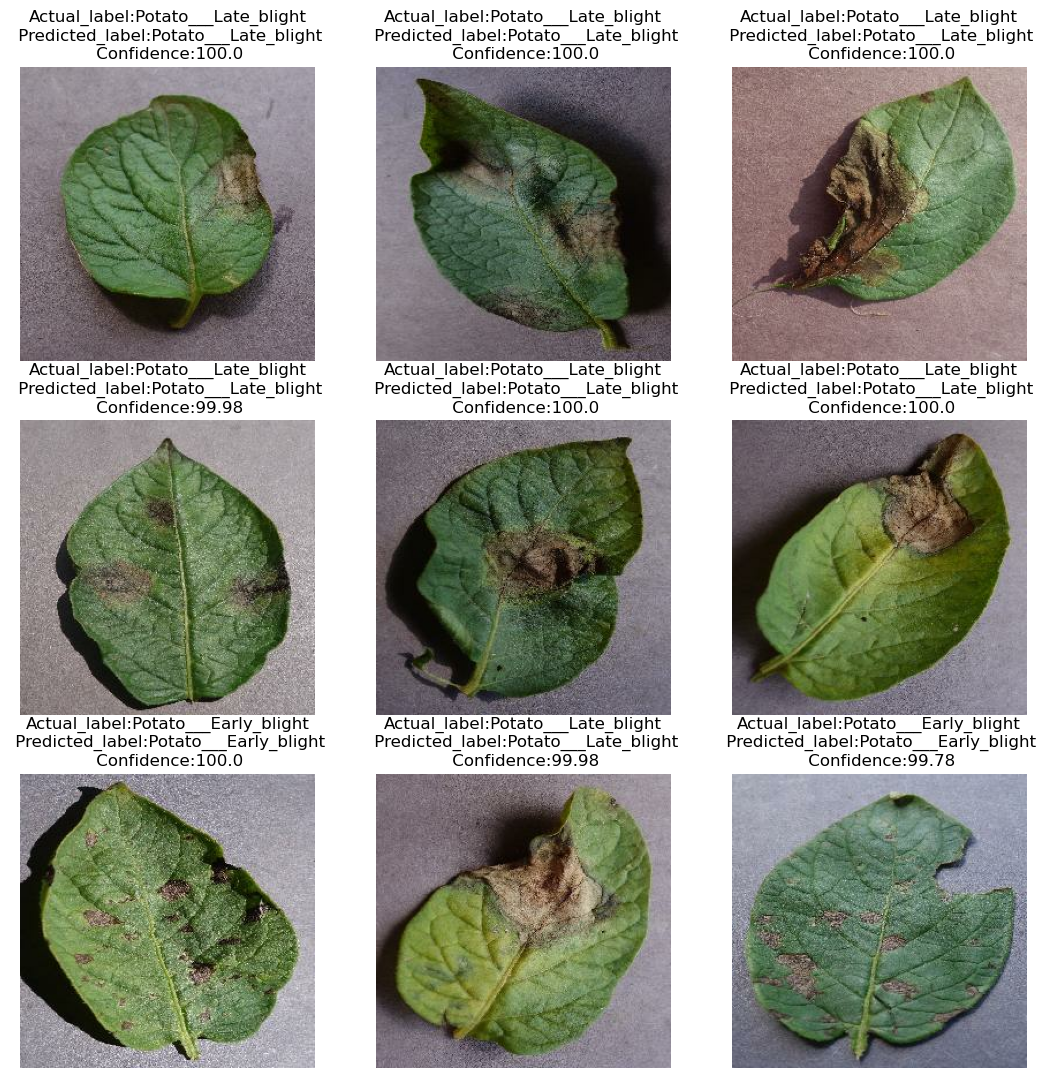

In [21]:
plt.figure(figsize=(13,13))
for image_batch,label_batch in test_ds.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.axis('off')
        predicted_label,confidence=predict(model,image_batch[i])
        actual_label=class_names[label_batch[i].numpy()]
        plt.title(f"Actual_label:{actual_label}\n Predicted_label:{predicted_label}\n Confidence:{confidence}")
        image=image_batch[0]
        actual_label=label_batch[0]
